
### Prerequisites

Before starting with Exploratory Data Analysis (EDA), ensure you have:

### 1. Dataset Download
Download the dataset from Kaggle:
- **Source:** [HAGRID Sample 30K 384p Dataset](https://www.kaggle.com/datasets/innominate817/hagrid-sample-30k-384p)

### 2. Directory Structure
Place the downloaded dataset in the following structure:
```
shared_artifacts/
└── images/
    └── hagrid_30k/
        ├── train_val_call/
        ├── train_val_dislike/
        ├── train_val_fist/
        ├── train_val_four/
        ├── train_val_like/
        ├── train_val_mute/
        ├── train_val_ok/
        ├── train_val_one/
        ├── train_val_palm/
        ├── train_val_peace/
        ├── train_val_rock/
        ├── train_val_stop/
        ├── train_val_stop_inverted/
        ├── train_val_three/
        ├── train_val_two_up/
        └── train_val_two_up_inverted/
```

### Dataset Attribution

**Dataset Attribution Required (CC BY-SA 4.0 License)**

**"HAGRID Sample 30K 384p"** dataset is licensed under **Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)**.

**Source:** [Kaggle Dataset Page](https://www.kaggle.com/datasets/innominate817/hagrid-sample-30k-384p)

**License Details:** [View CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/)

**Modifications:** This notebook uses the dataset as provided without modifications.



### Quick Verification Code

Run this cell to verify your directory structure is correct:

In [19]:
import os

# Expected directory path
dataset_path = "shared_artifacts/images/hagrid_30k"

# Check if directory exists
if os.path.exists(dataset_path):
    print("Dataset directory found!")
    
    # List subdirectories
    subdirs = [d for d in os.listdir(dataset_path) 
               if os.path.isdir(os.path.join(dataset_path, d))]
    
    print(f"\nFound {len(subdirs)} gesture categories:")
    for i, subdir in enumerate((subdirs), 1):
        print(f"   {i}. {subdir}")
        
else:
    print("Dataset directory not found!")
    print(f"Please ensure the dataset is at: {dataset_path}")

Dataset directory found!

Found 18 gesture categories:
   1. train_val_call
   2. train_val_dislike
   3. train_val_fist
   4. train_val_four
   5. train_val_like
   6. train_val_mute
   7. train_val_ok
   8. train_val_one
   9. train_val_palm
   10. train_val_peace
   11. train_val_peace_inverted
   12. train_val_rock
   13. train_val_stop
   14. train_val_stop_inverted
   15. train_val_three
   16. train_val_three2
   17. train_val_two_up
   18. train_val_two_up_inverted


In [20]:
import pandas as pd
from PIL import Image


analysis_data = []
extensions = ('.jpg')
corrupted_images = 0

for class_label in os.listdir(dataset_path):
    pure_label = class_label[10:] # removes 'train_val_' prefix
    label_path = os.path.join(dataset_path, class_label)

    if os.path.exists(label_path):
        files = os.listdir(label_path)

        image_files = [f for f in files if f.lower().endswith(extensions)]

        if len(files) != len(image_files):
            print(f"Warning: Some non-image (.jpg) files found in {label_path}")

        for image in image_files:
            image_path = os.path.join(label_path, image)

            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    type = img.mode # RGB, L, etc.
                    file_size = os.path.getsize(image_path) / 1024 # KB

                    analysis_data.append({
                        'filename': image,
                        'class': pure_label,
                        'width': width,
                        'height': height,
                        'aspect_ratio': round(width/height, 2),
                        'type': type,
                        'file_size_kb': round(file_size, 2),
                        'path': image_path
                    })
                
            except Exception as e:
                print(f"Error reading {image_path}: {e}")
                corrupted_images += 1

df = pd.DataFrame(analysis_data)

In [21]:
print(f"Total images: {len(df)}")
print(f"Number of classes: {df['class'].nunique()}")
print(f"Average aspect ratio: {df['aspect_ratio'].mean():.2f}")
print(f"Average dimensions: {df['width'].mean():.2f}x{df['height'].mean():.2f}")
print(f"Min dimensions: {df['width'].min()}x{df['height'].min()}")
print(f"Max dimensions: {df['width'].max()}x{df['height'].max()}")
print(f"Average file size: {df['file_size_kb'].mean():.2f} KB")
print(f"Corrupted images: {corrupted_images}")
print(f"Types present: {df['type'].unique()}")

Total images: 31833
Number of classes: 18
Average aspect ratio: 0.88
Average dimensions: 420.01x504.01
Min dimensions: 384x384
Max dimensions: 854x1007
Average file size: 24.95 KB
Corrupted images: 0
Types present: ['RGB']


The information we have gathered so far:
- Total number of images is 31833
- Number of classes is 18
- Dimensions are ranging from 384x384 to 854x1007
- No corrupted images
- All images are in RGB format
- All files are .jpg

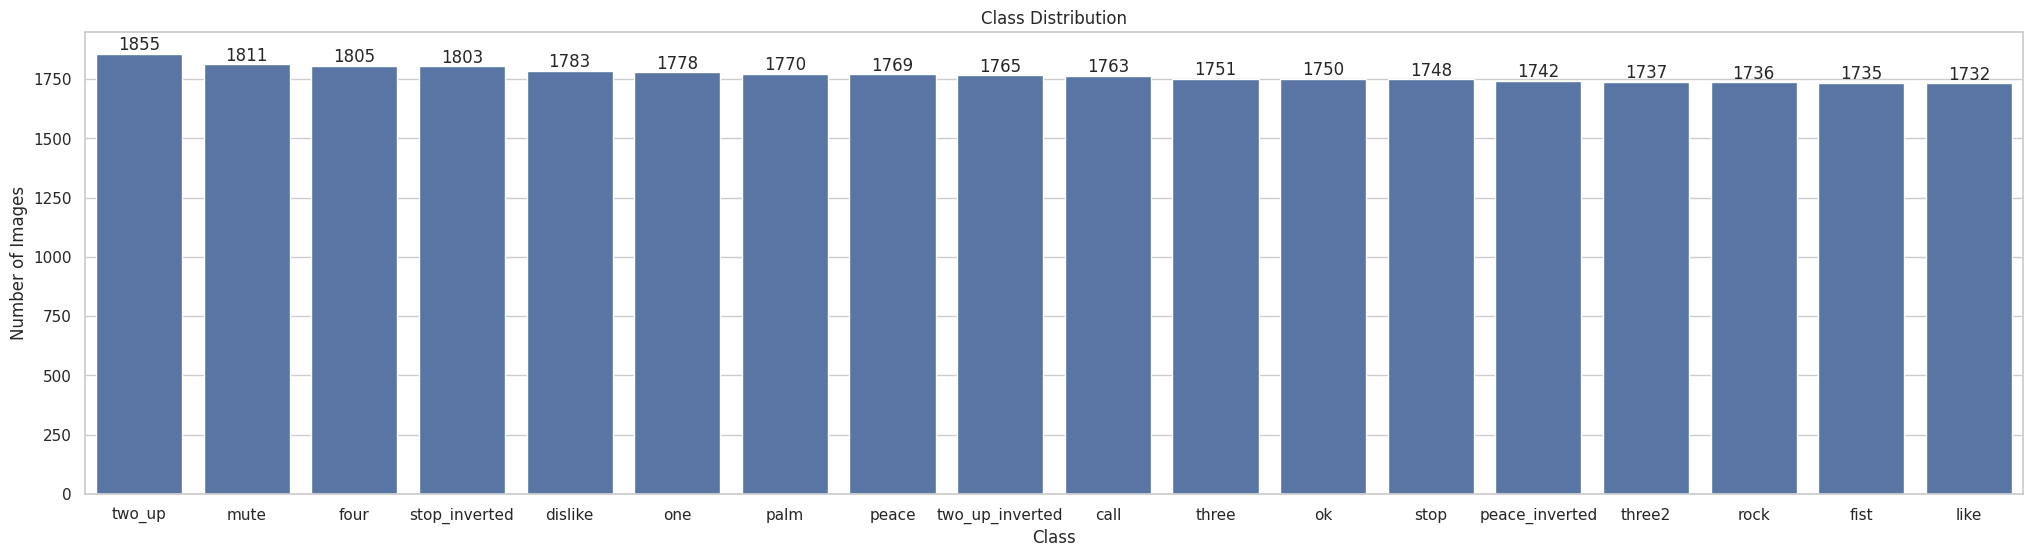

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Class distribution
classes = df['class'].value_counts()
plt.figure(figsize=(25, 6))
barplot = sns.barplot(x=classes.index, y=classes.values)
barplot.bar_label(barplot.containers[0])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [23]:
# Dimension distribution
print(df[['width', 'height']].describe())
standard_mask = (df['width'] == 384) & (df['height'] == 512)
standard_mask_rotated = (df['width'] == 512) & (df['height'] == 384)
print(f"Standard (384×512): {standard_mask.sum()} images ({standard_mask.sum()/len(df)*100:.1f}%)")
print(f"Standard 2 (512×384): {standard_mask_rotated.sum()} images ({standard_mask_rotated.sum()/len(df)*100:.1f}%)")
print(f"Non-standard: {(~standard_mask & ~standard_mask_rotated).sum()} images ({(~standard_mask & ~standard_mask_rotated).sum()/len(df)*100:.1f}%)")

              width        height
count  31833.000000  31833.000000
mean     420.010178    504.010241
std       84.191991     89.280018
min      384.000000    384.000000
25%      384.000000    512.000000
50%      384.000000    512.000000
75%      384.000000    512.000000
max      854.000000   1007.000000
Standard (384×512): 19235 images (60.4%)
Standard 2 (512×384): 3380 images (10.6%)
Non-standard: 9218 images (29.0%)


### Lets take a look at sample images

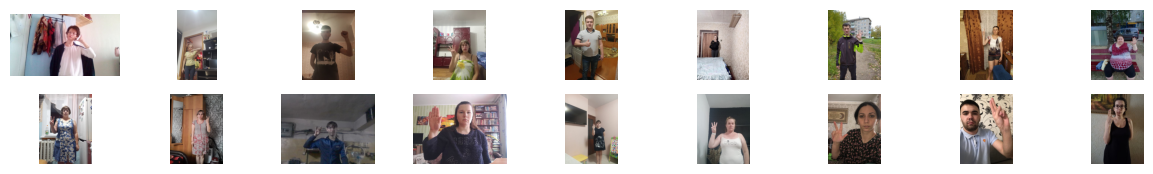

In [25]:
import random

preview = []
for class_label in os.listdir(dataset_path):
    pure_label = class_label[10:] # removes 'train_val_' prefix
    label_path = os.path.join(dataset_path, class_label)

    if os.path.exists(label_path):
        files = os.listdir(label_path)

        image_files = [f for f in files if f.lower().endswith(extensions)]

        rand_idx = random.randint(0, len(image_files) - 1)
        preview.append(os.path.join(dataset_path, class_label, image_files[rand_idx]))

rows, cols = 2, 9

fig, axes = plt.subplots(rows, cols, figsize=(15,2))

for ax, image in zip(axes.flat, preview):
    with Image.open(image) as img:
        ax.imshow(img)
        ax.set_axis_off()
    
        